In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

STDOUTS_DIR = 'stdouts'
BASELINE_DIR = 'stdouts-baseline'
MARKDOWN_DIR = 'md'

In [87]:
def read_stdouts(dir):
    stdouts = {}
    for file in os.listdir(dir):
        if not file.endswith('.txt'):
            continue
        with open(os.path.join(dir, file)) as f:
            key = os.path.basename(file).split('.')[0]
            stdouts[key] = f.read()
    return stdouts

def parse_stats(stdout):
    stdout = stdout.strip()
    lines = stdout.split("\n")
    stats = {}

    in_times = False
    for line in lines:
        line = line.strip()
        if line.startswith("Vtree Time"):
            stats["vtree_time"] = float(line.rsplit(maxsplit=1)[1].rstrip("s"))
        elif line.startswith("Compile Time"):
            stats["compile_time"] = float(line.rsplit(maxsplit=1)[1].rstrip("s"))
        elif line.startswith("Total Time"):
            stats["total_time"] = float(line.rsplit(maxsplit=1)[1].rstrip("s"))
        elif line.startswith("NNF Time"):
            stats["nnf_time"] = float(line.rsplit(maxsplit=1)[1].rstrip("s"))
        elif line.startswith("Total API time"):
            stats["api_time"] = float(line.rsplit(maxsplit=1)[1].rstrip("s"))
        elif line.startswith("Total API calls"):
            stats["api_calls"] = int(line.rsplit(maxsplit=1)[1])

        if line == "=TIMESTART=":
            in_times = True
            continue
        if line == "=TIMEEND=":
            in_times = False
            continue
        if in_times:
            function, time = line.strip().rsplit(maxsplit=1)
            time = float(time.rstrip("s"))
            stats[function] = time


    return stats

In [88]:
stdouts = read_stdouts(STDOUTS_DIR)

stats = []
for cnf, stdout in stdouts.items():
    stats.append(parse_stats(stdout))
    stats[-1]["cnf"] = cnf

df = pd.DataFrame(stats)
df

,vtree_time,compile_time,total_time,sat_is_instantiated_var,sat_is_irrelevant_var,sat_var_count,sat_var2pliteral,sat_var2nliteral,sat_is_implied_literal,sat_literal_weight,...,vtree_manager_free,vtree_save,vtree_save_as_dot,vtree_print_widths,vtree_is_leaf,vtree_is_shannon_node,vtree_shannon_var,api_time,api_calls,cnf
0,9.657,0.310,9.993,0.002370,0.000042,0.0,0.010673,0.013055,0.025347,0.0,...,0.013359,0.0,0.0,0.000024,0.000666,0.002513,0.001871,9.905336,4323196,qg3-08
1,1.023,147.163,148.936,0.469348,0.041230,0.0,8.831379,11.176543,20.536146,0.0,...,0.260461,0.0,0.0,0.000070,0.262914,0.899608,0.511828,68.026736,2741849866,C210_FVF
2,0.522,10.460,11.006,0.056994,0.003297,0.0,0.219753,0.279613,0.522536,0.0,...,0.013004,0.0,0.0,0.000013,0.025413,0.078108,0.062100,5.998578,169665534,ais10
3,0.714,1249.201,1249.931,0.147342,0.138434,0.0,5.806524,6.992804,13.086683,0.0,...,0.012991,0.0,0.0,0.000012,0.088864,0.179177,0.194298,1201.346645,1485274979,uf250-026
4,0.605,4.104,4.726,0.001331,0.001488,0.0,0.000828,0.000686,0.000377,0.0,...,0.012655,0.0,0.0,0.000034,0.000906,0.001208,0.001741,4.737992,396861,par16-5
5,1.878,0.012,1.908,0.000203,0.000008,0.0,0.000336,0.000419,0.000781,0.0,...,0.012647,0.0,0.0,0.000018,0.000089,0.000282,0.000221,1.947572,157912,huge
6,0.069,1.964,2.048,0.001330,0.000876,0.0,0.049108,0.061345,0.115412,0.0,...,0.012443,0.0,0.0,0.000009,0.001246,0.001825,0.001714,1.553796,16315281,par16-1-c
7,0.435,5.240,5.755,0.329890,0.000771,0.0,0.156615,0.182496,0.343092,0.0,...,0.016111,0.0,0.0,0.000022,0.134580,0.395562,0.249121,3.256965,83073846,s1488
8,0.551,3.912,4.481,0.002799,0.002980,0.0,0.001978,0.001586,0.000572,0.0,...,0.012701,0.0,0.0,0.000047,0.001923,0.002444,0.003691,4.489385,908861,par16-3
9,0.072,4.127,4.277,0.158153,0.001524,0.0,0.152985,0.191550,0.314538,0.0,...,0.022778,0.0,0.0,0.000009,0.084318,0.211831,0.161417,2.153908,71225346,s832


### Baseline Timing Differences

Naively approximating how much overhead timing each of the API calls doesn't make the time with overhead similar to the baseline.

It works in most cases, but not all of them, where the time with profiling instrumentation takes on average about 90% more time (median ~42% more).

In [89]:
baseline = read_stdouts(BASELINE_DIR)
baseline_stats = []
for cnf, stdout in baseline.items():
    baseline_stats.append(parse_stats(stdout))
    baseline_stats[-1]["cnf"] = cnf

baseline_df = pd.DataFrame(baseline_stats)
baseline_df

,vtree_time,compile_time,total_time,cnf
0,9.821,0.085,9.932,qg3-08
1,1.063,9.972,11.797,C210_FVF
2,0.441,2.119,2.583,ais10
3,0.769,1190.524,1191.313,uf250-026
4,0.604,3.722,4.342,par16-5
5,1.927,0.004,1.951,huge
6,0.086,1.200,1.300,par16-1-c
7,0.435,0.850,1.366,s1488
8,0.624,3.873,4.514,par16-3
9,0.092,0.622,0.793,s832


In [90]:
# experimentally determined, averaged over 1,000 runs
MILLION_TIMING_OVERHEAD = 0.039447

overhead_analysis = df.copy()

overhead_analysis["api_overhead"] = overhead_analysis["api_calls"] / 1000000 * MILLION_TIMING_OVERHEAD
overhead_analysis["approx_total_time"] = overhead_analysis["total_time"] - overhead_analysis["api_overhead"]

# join with baseline total_time
joined = overhead_analysis.merge(baseline_df[["cnf", "total_time"]], on="cnf", suffixes=("", "_baseline"))

# percent difference between approx_total_time and total_time_baseline
joined["percent_diff"] = (abs(joined["approx_total_time"] - joined["total_time_baseline"])) / joined["total_time_baseline"]

print("Average percent difference:", joined["percent_diff"].mean())
print("Median percent difference:", joined["percent_diff"].median())

joined[["total_time", "approx_total_time", "total_time_baseline", "percent_diff", "cnf"]]

Average percent difference: 0.8803624973292581
Median percent difference: 0.4233124276964959


,total_time,approx_total_time,total_time_baseline,percent_diff,cnf
0,9.993,9.822463,9.932,0.011029,qg3-08
1,148.936,40.778248,11.797,2.456663,C210_FVF
2,11.006,4.313204,2.583,0.669843,ais10
3,1249.931,1191.341358,1191.313,0.000024,uf250-026
4,4.726,4.710345,4.342,0.084833,par16-5
5,1.908,1.901771,1.951,0.025233,huge
6,2.048,1.404411,1.300,0.080316,par16-1-c
7,5.755,2.477986,1.366,0.814045,s1488
8,4.481,4.445148,4.514,0.015253,par16-3
9,4.277,1.467374,0.793,0.850408,s832


### Vtree Manager New Timing Differences

Although the vtree time and the vtree_manager_new time are practically the same, it looks like the internal logic between getting the vtree and compiling (perhaps because of printing stats?) takes up a decent amount of time (up to almost 16 seconds). The numbers are probably more meaningful if we omit `vtree_manager_new` and subtract it from the total time.


In [35]:
vtree_analysis = df[["vtree_time", "vtree_manager_new", "cnf"]].copy()
vtree_analysis["vtree_inaccuracy"] = vtree_analysis["vtree_time"] - vtree_analysis["vtree_manager_new"]

print("Average vtree inaccuracy:", vtree_analysis["vtree_inaccuracy"].mean())
print("Max vtree inaccuracy:", abs(vtree_analysis["vtree_inaccuracy"]).max())
print("Min vtree inaccuracy:", abs(vtree_analysis["vtree_inaccuracy"]).min())
vtree_analysis

Average vtree inaccuracy: -0.0003815208333333084
Max vtree inaccuracy: 0.008186000000002025
Min vtree inaccuracy: 3.0000000000030003e-06


,vtree_time,vtree_manager_new,cnf,vtree_inaccuracy
0,9.657,9.657321,qg3-08,-0.000321
1,1.023,1.022725,C210_FVF,0.000275
2,0.522,0.522105,ais10,-0.000105
3,0.714,0.713658,uf250-026,0.000342
4,0.605,0.604678,par16-5,0.000322
5,1.878,1.877886,huge,0.000114
6,0.069,0.069337,par16-1-c,-0.000337
7,0.435,0.435431,s1488,-0.000431
8,0.551,0.550677,par16-3,0.000323
9,0.072,0.072190,s832,-0.000190


In [36]:
# checking compile time
compile_analysis = df[["total_time", "compile_time", "vtree_manager_new", "cnf"]].copy()
compile_analysis["total_diff"] = compile_analysis["total_time"] - compile_analysis["vtree_manager_new"]
compile_analysis["compile_inaccuracy"] = compile_analysis["compile_time"] - compile_analysis["total_diff"]
compile_analysis["percent_inaccuracy"] = compile_analysis["compile_inaccuracy"] / compile_analysis["total_time"]

print("Average compile inaccuracy:", compile_analysis["compile_inaccuracy"].mean())
print("Max compile inaccuracy:", abs(compile_analysis["compile_inaccuracy"]).max())
print("Min compile inaccuracy:", abs(compile_analysis["compile_inaccuracy"]).min())
compile_analysis

Average compile inaccuracy: -1.1259726458333317
Max compile inaccuracy: 15.883893999999827
Min compile inaccuracy: 0.014663000000000093


,total_time,compile_time,vtree_manager_new,cnf,total_diff,compile_inaccuracy,percent_inaccuracy
0,9.993,0.310,9.657321,qg3-08,0.335679,-0.025679,-0.002570
1,148.936,147.163,1.022725,C210_FVF,147.913275,-0.750275,-0.005038
2,11.006,10.460,0.522105,ais10,10.483895,-0.023895,-0.002171
3,1249.931,1249.201,0.713658,uf250-026,1249.217342,-0.016342,-0.000013
4,4.726,4.104,0.604678,par16-5,4.121322,-0.017322,-0.003665
5,1.908,0.012,1.877886,huge,0.030114,-0.018114,-0.009494
6,2.048,1.964,0.069337,par16-1-c,1.978663,-0.014663,-0.007160
7,5.755,5.240,0.435431,s1488,5.319569,-0.079569,-0.013826
8,4.481,3.912,0.550677,par16-3,3.930323,-0.018323,-0.004089
9,4.277,4.127,0.072190,s832,4.204810,-0.077810,-0.018193


### Getting the Stats

In [94]:
stats_df = df.copy()

# drop the vtree_time column (just because it confuses the vtree APIs)
stats_df = stats_df.drop(columns=["vtree_time"])

# subtract vtree_manager_new from total_time
stats_df["total_time"] = stats_df["total_time"] - stats_df["vtree_manager_new"]
stats_df = stats_df.drop(columns=["vtree_manager_new"])

# remove zero columns
stats_df = stats_df.loc[:, (stats_df != 0).any(axis=0)]

stats_df["sat_total"] = stats_df.filter(like="sat_").sum(axis=1)
stats_df["vtree_total"] = stats_df.filter(like="vtree_").sum(axis=1)
stats_df["nnf_total"] = stats_df.filter(like="nnf_").sum(axis=1)

stats_df

,compile_time,total_time,sat_is_instantiated_var,sat_is_irrelevant_var,sat_var2pliteral,sat_var2nliteral,sat_is_implied_literal,sat_decide_literal,sat_undo_decide_literal,sat_is_subsumed_clause,...,vtree_print_widths,vtree_is_leaf,vtree_is_shannon_node,vtree_shannon_var,api_time,api_calls,cnf,sat_total,vtree_total,nnf_total
0,0.310,0.335679,0.002370,0.000042,0.010673,0.013055,0.025347,0.032608,0.012343,0.050177,...,0.000024,0.000666,0.002513,0.001871,9.905336,4323196,qg3-08,0.179453,0.018433,0.050126
1,147.163,147.913275,0.469348,0.041230,8.831379,11.176543,20.536146,0.479700,0.197778,20.997574,...,0.000070,0.262914,0.899608,0.511828,68.026736,2741849866,C210_FVF,62.738517,1.934881,2.330613
2,10.460,10.483895,0.056994,0.003297,0.219753,0.279613,0.522536,0.984356,0.199795,2.560455,...,0.000013,0.025413,0.078108,0.062100,5.998578,169665534,ais10,5.201291,0.178638,0.096543
3,1249.201,1249.217342,0.147342,0.138434,5.806524,6.992804,13.086683,615.913098,7.860262,10.129335,...,0.000012,0.088864,0.179177,0.194298,1201.346645,1485274979,uf250-026,1200.114582,0.475342,0.043063
4,4.104,4.121322,0.001331,0.001488,0.000828,0.000686,0.000377,1.726803,0.235766,0.000000,...,0.000034,0.000906,0.001208,0.001741,4.737992,396861,par16-5,4.089235,0.016544,0.027536
5,0.012,0.030114,0.000203,0.000008,0.000336,0.000419,0.000781,0.001541,0.001015,0.001257,...,0.000018,0.000089,0.000282,0.000221,1.947572,157912,huge,0.012368,0.013257,0.044061
6,1.964,1.978663,0.001330,0.000876,0.049108,0.061345,0.115412,0.508320,0.078974,0.152417,...,0.000009,0.001246,0.001825,0.001714,1.553796,16315281,par16-1-c,1.440143,0.017237,0.027079
7,5.240,5.319569,0.329890,0.000771,0.156615,0.182496,0.343092,0.037725,0.012666,0.066774,...,0.000022,0.134580,0.395562,0.249121,3.256965,83073846,s1488,1.132892,0.795396,0.893245
8,3.912,3.930323,0.002799,0.002980,0.001978,0.001586,0.000572,1.559871,0.693170,0.000000,...,0.000047,0.001923,0.002444,0.003691,4.489385,908861,par16-3,3.879839,0.020806,0.038065
9,4.127,4.204810,0.158153,0.001524,0.152985,0.191550,0.314538,0.022004,0.006606,0.198027,...,0.000009,0.084318,0.211831,0.161417,2.153908,71225346,s832,1.049507,0.480353,0.551861


In [96]:
percents_df = stats_df.copy()

sat_cols = [col for col in percents_df.columns if col.startswith("sat_")]
vtree_cols = [col for col in percents_df.columns if col.startswith("vtree_")]
nnf_cols = [col for col in percents_df.columns if col.startswith("nnf_")]

percents_df[sat_cols] = percents_df[sat_cols].div(percents_df["total_time"], axis=0)
percents_df[vtree_cols] = percents_df[vtree_cols].div(percents_df["total_time"], axis=0)
percents_df[nnf_cols] = percents_df[nnf_cols].div(percents_df["total_time"], axis=0)

percents_df

,compile_time,total_time,sat_is_instantiated_var,sat_is_irrelevant_var,sat_var2pliteral,sat_var2nliteral,sat_is_implied_literal,sat_decide_literal,sat_undo_decide_literal,sat_is_subsumed_clause,...,vtree_print_widths,vtree_is_leaf,vtree_is_shannon_node,vtree_shannon_var,api_time,api_calls,cnf,sat_total,vtree_total,nnf_total
0,0.310,0.335679,0.007060,0.000125,0.031795,0.038891,0.075510,0.097140,0.036770,0.149479,...,7.149688e-05,0.001984,0.007486,0.005574,9.905336,4323196,qg3-08,0.534597,0.054913,0.149327
1,147.163,147.913275,0.003173,0.000279,0.059706,0.075561,0.138839,0.003243,0.001337,0.141959,...,4.732503e-07,0.001777,0.006082,0.003460,68.026736,2741849866,C210_FVF,0.424157,0.013081,0.015757
2,10.460,10.483895,0.005436,0.000314,0.020961,0.026671,0.049842,0.093892,0.019057,0.244227,...,1.239997e-06,0.002424,0.007450,0.005923,5.998578,169665534,ais10,0.496122,0.017039,0.009209
3,1249.201,1249.217342,0.000118,0.000111,0.004648,0.005598,0.010476,0.493039,0.006292,0.008109,...,9.606015e-09,0.000071,0.000143,0.000156,1201.346645,1485274979,uf250-026,0.960693,0.000381,0.000034
4,4.104,4.121322,0.000323,0.000361,0.000201,0.000166,0.000091,0.418992,0.057206,0.000000,...,8.249780e-06,0.000220,0.000293,0.000422,4.737992,396861,par16-5,0.992214,0.004014,0.006681
5,0.012,0.030114,0.006741,0.000266,0.011158,0.013914,0.025935,0.051172,0.033705,0.041741,...,5.977286e-04,0.002955,0.009364,0.007339,1.947572,157912,huge,0.410706,0.440227,1.463140
6,1.964,1.978663,0.000672,0.000443,0.024819,0.031003,0.058328,0.256901,0.039913,0.077030,...,4.548526e-06,0.000630,0.000922,0.000866,1.553796,16315281,par16-1-c,0.727836,0.008711,0.013686
7,5.240,5.319569,0.062014,0.000145,0.029441,0.034307,0.064496,0.007092,0.002381,0.012553,...,4.135673e-06,0.025299,0.074360,0.046831,3.256965,83073846,s1488,0.212967,0.149523,0.167917
8,3.912,3.930323,0.000712,0.000758,0.000503,0.000404,0.000146,0.396881,0.176365,0.000000,...,1.195830e-05,0.000489,0.000622,0.000939,4.489385,908861,par16-3,0.987155,0.005294,0.009685
9,4.127,4.204810,0.037612,0.000362,0.036383,0.045555,0.074804,0.005233,0.001571,0.047095,...,2.140406e-06,0.020053,0.050378,0.038389,2.153908,71225346,s832,0.249597,0.114239,0.131245


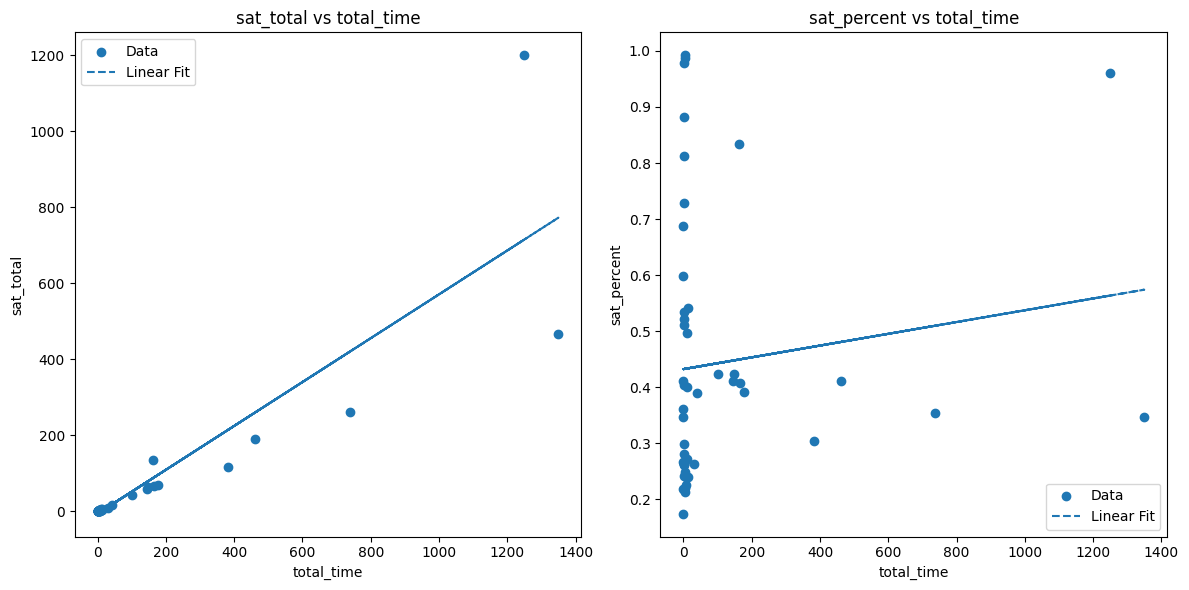

In [97]:
# plot sat time by total time and percent sat time by total time

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

degree = 1
coefficients_total = np.polyfit(stats_df['total_time'], stats_df['sat_total'], degree)
poly_total = np.poly1d(coefficients_total)

axes[0].scatter(stats_df['total_time'], stats_df['sat_total'], marker='o', linestyle='-', label='Data')
axes[0].plot(stats_df['total_time'], poly_total(stats_df['total_time']), linestyle='--', label='Linear Fit')
axes[0].set_title('sat_total vs total_time')
axes[0].set_xlabel('total_time')
axes[0].set_ylabel('sat_total')
axes[0].legend()

coefficients_percent = np.polyfit(percents_df['total_time'], percents_df['sat_total'], degree)
poly_percent = np.poly1d(coefficients_percent)

axes[1].scatter(percents_df['total_time'], percents_df['sat_total'], marker='o', linestyle='-', label='Data')
axes[1].plot(percents_df['total_time'], poly_percent(percents_df['total_time']), linestyle='--', label='Linear Fit')
axes[1].set_title('sat_percent vs total_time')
axes[1].set_xlabel('total_time')
axes[1].set_ylabel('sat_percent')
axes[1].legend()

plt.tight_layout()

plt.show()

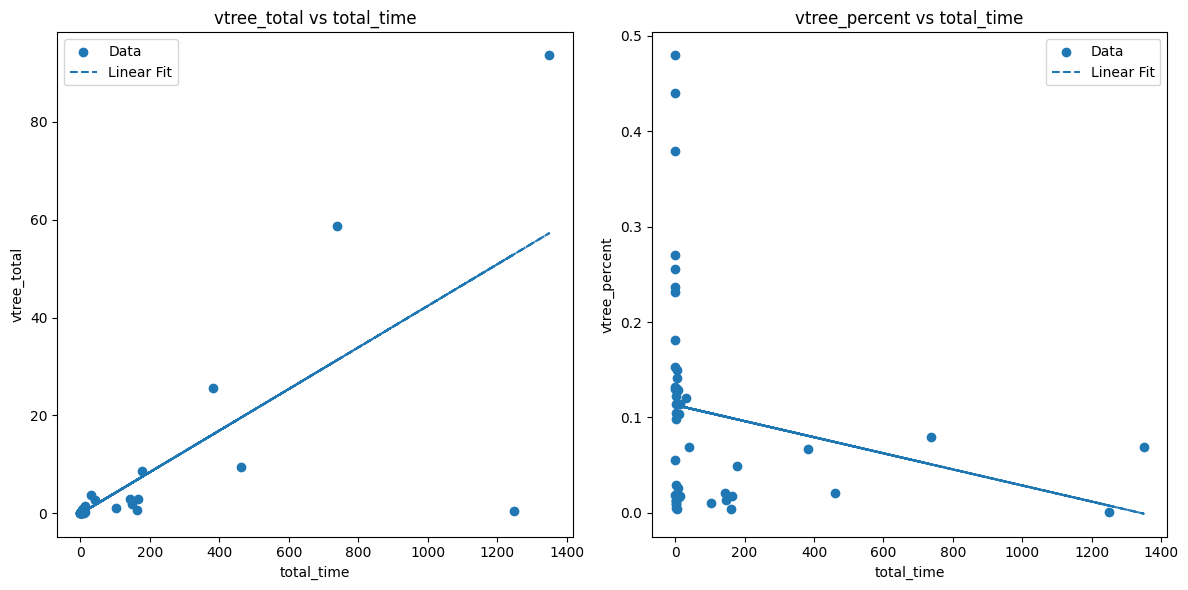

In [98]:
# plot vtree time by total time and percent vtree time by total time

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

degree = 1
coefficients_total = np.polyfit(stats_df['total_time'], stats_df['vtree_total'], degree)
poly_total = np.poly1d(coefficients_total)

axes[0].scatter(stats_df['total_time'], stats_df['vtree_total'], marker='o', linestyle='-', label='Data')
axes[0].plot(stats_df['total_time'], poly_total(stats_df['total_time']), linestyle='--', label='Linear Fit')
axes[0].set_title('vtree_total vs total_time')
axes[0].set_xlabel('total_time')
axes[0].set_ylabel('vtree_total')
axes[0].legend()

coefficients_percent = np.polyfit(percents_df['total_time'], percents_df['vtree_total'], degree)
poly_percent = np.poly1d(coefficients_percent)

axes[1].scatter(percents_df['total_time'], percents_df['vtree_total'], marker='o', linestyle='-', label='Data')
axes[1].plot(percents_df['total_time'], poly_percent(percents_df['total_time']), linestyle='--', label='Linear Fit')
axes[1].set_title('vtree_percent vs total_time')
axes[1].set_xlabel('total_time')
axes[1].set_ylabel('vtree_percent')
axes[1].legend()

plt.tight_layout()

plt.show()

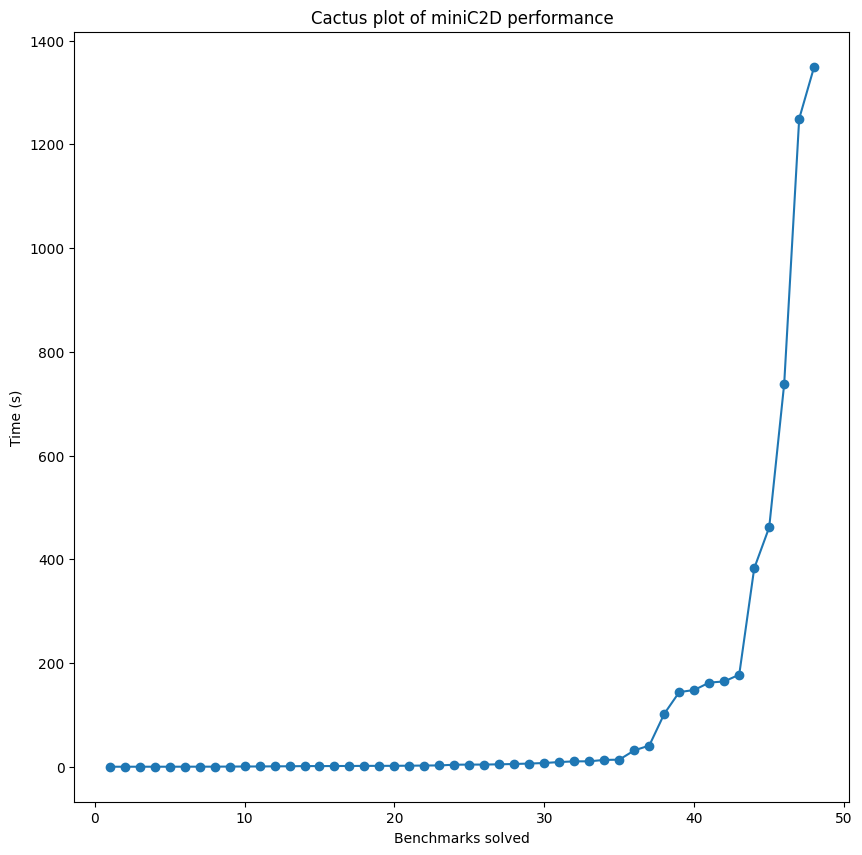

In [99]:
# cactus plot
cactus_df = stats_df.copy()

cactus_df = cactus_df.sort_values(by="total_time", ascending=False).reset_index(drop=True)

benchmarks_solved = range(len(df), 0, -1)

plt.figure(figsize=(10, 10))
plt.plot(benchmarks_solved, cactus_df["total_time"], label="miniC2D", marker='o')

plt.xlabel("Benchmarks solved")
plt.ylabel("Time (s)")
plt.title("Cactus plot of miniC2D performance")
plt.show()


### Exporting to Markdown

In [115]:
# individual
for cnf in stats:
    cnf_name = cnf['cnf']
    df = pd.DataFrame(cnf, index=[0])
    df['total_time'] = df['total_time'] - df['vtree_manager_new']
    df = df.drop(columns=['cnf', 'api_calls', 'vtree_time', 'compile_time', 'api_time', 'vtree_manager_new']).T.reset_index()
    df.columns = ['Function', 'Time']

    sat_total = df[df['Function'].str.startswith('sat_')]['Time'].sum()
    vtree_total = df[df['Function'].str.startswith('vtree_')]['Time'].sum()
    nnf_total = df[df['Function'].str.startswith('nnf_')]['Time'].sum()

    df.loc[len(df)] = { 'Function': 'sat_total', 'Time': sat_total }
    df.loc[len(df)] = { 'Function': 'vtree_total', 'Time': vtree_total }
    df.loc[len(df)] = { 'Function': 'nnf_total', 'Time': nnf_total }

    df['Percent'] = df['Time'] / df.loc[df['Function'] == 'total_time', 'Time'].values[0]

    functions_df = df[~df['Function'].str.contains('total')].copy()
    functions_df = functions_df[functions_df['Time'] > 0]
    totals_df = df[df['Function'].str.contains('total')].copy()

    functions_df = functions_df.sort_values(by="Time", ascending=False).reset_index(drop=True)
    totals_df = totals_df.sort_values(by="Time", ascending=False).reset_index(drop=True)

    with open(f"{MARKDOWN_DIR}/{cnf_name}.md", "w+") as f:
        f.write(f"## {cnf_name}\n\n")
        f.write(f"*Note: total time omits `vtree_manager_new` time since it should be constant*\n\n")
        f.write(f"### Totals\n\n")
        f.write(f"{totals_df.to_markdown(index=False)}\n\n")
        f.write(f"### Functions\n\n")
        f.write(f"{functions_df.to_markdown(index=False)}\n")


In [116]:
# total
total_df = pd.DataFrame(stats).drop(columns=['cnf', 'api_calls', 'vtree_time', 'compile_time', 'api_time'])

total_df = total_df.sum().to_frame().T
total_df['total_time'] = total_df['total_time'] - total_df['vtree_manager_new']
total_df = total_df.drop(columns=['vtree_manager_new'])
total_df = total_df.T.reset_index()
total_df.columns = ['Function', 'Time']

sat_total = total_df[total_df['Function'].str.startswith('sat_')]['Time'].sum()
vtree_total = total_df[total_df['Function'].str.startswith('vtree_')]['Time'].sum()
nnf_total = total_df[total_df['Function'].str.startswith('nnf_')]['Time'].sum()

total_df.loc[len(total_df)] = { 'Function': 'sat_total', 'Time': sat_total }
total_df.loc[len(total_df)] = { 'Function': 'vtree_total', 'Time': vtree_total }
total_df.loc[len(total_df)] = { 'Function': 'nnf_total', 'Time': nnf_total }

total_df['Percent'] = total_df['Time'] / total_df.loc[total_df['Function'] == 'total_time', 'Time'].values[0]

functions_df = total_df[~total_df['Function'].str.contains('total')].copy()
functions_df = functions_df[functions_df['Time'] > 0]
totals_df = total_df[total_df['Function'].str.contains('total')].copy()

functions_df = functions_df.sort_values(by="Time", ascending=False).reset_index(drop=True)
totals_df = totals_df.sort_values(by="Time", ascending=False).reset_index(drop=True)

with open(f"{MARKDOWN_DIR}/all_stats.md", "w+") as f:
    f.write(f"## All Stats\n\n")
    f.write(f"*Note: total time omits `vtree_manager_new` time since it should be constant*\n\n")
    f.write(f"### Totals\n\n")
    f.write(f"{totals_df.to_markdown(index=False)}\n\n")
    f.write(f"### Functions\n\n")
    f.write(f"{functions_df.to_markdown(index=False)}\n")


In [ ]:
# total omitting outlier: uf250-026
total_df = pd.DataFrame(stats).drop(columns=['api_calls', 'vtree_time', 'compile_time', 'api_time'])
total_df = total_df[total_df['cnf'] != 'uf250-026']
total_df = total_df.drop(columns=['cnf'])

total_df = total_df.sum().to_frame().T
total_df['total_time'] = total_df['total_time'] - total_df['vtree_manager_new']
total_df = total_df.drop(columns=['vtree_manager_new'])
total_df = total_df.T.reset_index()
total_df.columns = ['Function', 'Time']

sat_total = total_df[total_df['Function'].str.startswith('sat_')]['Time'].sum()
vtree_total = total_df[total_df['Function'].str.startswith('vtree_')]['Time'].sum()
nnf_total = total_df[total_df['Function'].str.startswith('nnf_')]['Time'].sum()

total_df.loc[len(total_df)] = { 'Function': 'sat_total', 'Time': sat_total }
total_df.loc[len(total_df)] = { 'Function': 'vtree_total', 'Time': vtree_total }
total_df.loc[len(total_df)] = { 'Function': 'nnf_total', 'Time': nnf_total }

total_df['Percent'] = total_df['Time'] / total_df.loc[total_df['Function'] == 'total_time', 'Time'].values[0]

functions_df = total_df[~total_df['Function'].str.contains('total')].copy()
functions_df = functions_df[functions_df['Time'] > 0]
totals_df = total_df[total_df['Function'].str.contains('total')].copy()

functions_df = functions_df.sort_values(by="Time", ascending=False).reset_index(drop=True)
totals_df = totals_df.sort_values(by="Time", ascending=False).reset_index(drop=True)

with open(f"{MARKDOWN_DIR}/all_stats_removed_outlier.md", "w+") as f:
    f.write(f"## All Stats (without outlier)\n\n")
    f.write(f"*Note: total time omits `vtree_manager_new` time since it should be constant*\n\n")
    f.write(f"### Totals\n\n")
    f.write(f"{totals_df.to_markdown(index=False)}\n\n")
    f.write(f"### Functions\n\n")
    f.write(f"{functions_df.to_markdown(index=False)}\n")